## Laboratorio: Usos reales de la morfología matemática
### **Nombres:**  Ponce Proaño Miguel Alejandro 
### **Asignatura:**  Percepción Computacional
### **Actividad:** Nro. 3 - mia03_t10_lab.docx

# Introducción

Para el desarrollo del ejercicio se realizarán dos propuestas basadas en el uso de umbralización adaptativa buscando devolver una imagen parecida a la que se muestra en la figura(1).
* La primera propuesta consiste en contar los objetos dentro en la imagen utilizando técnicas de morfología matemática para poder reducir esa parte colindante, y poder contar los objetos por separado.
* La segunda propuesta se tomará ventaja del poder de procesamiento de varios algoritmos que utilizara una combinación de varias técnicas de morfología para procesar las imágenes y tratar de determinar la con cuál se ha obtenido mejores resultados.


Figura(1) Posible resultado:
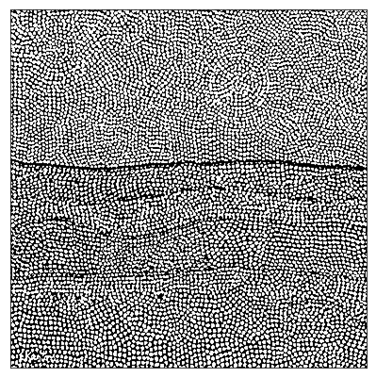

# Inicialización

In [18]:
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [19]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [20]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [21]:
from scipy import ndimage as ndi
from skimage.segmentation import clear_border

In [22]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [23]:
pintura_puntos = rgb2gray(io.imread(fname='img/Pintura_Puntos.jpg'))

# Escribe tu código aquí

In [24]:
lista_algortimo_img_dicos=dict()
imagenes_cercanas=dict()
n_iteraciones = 5
min_area_region = 2
max_area_region = 450
max_top_imagenes = 7 

Se muestra la imagen en blanco y negro sobre la cual se desarrollará el ejerció.

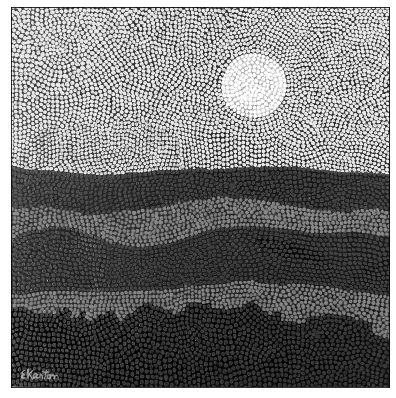

In [25]:
imshow(pintura_puntos)

Se implementa el uso del umbral **threshold_otsu**, el cual esta muy lejos del posible resultado.

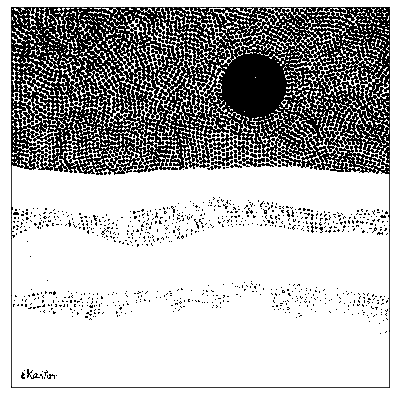

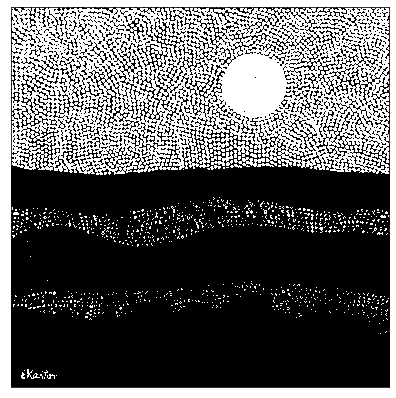

In [26]:
val_otsu=threshold_otsu(pintura_puntos)
img_otsu = pintura_puntos<val_otsu
imshow(img_otsu)
imshow(~img_otsu)

### Análisis umbral threshold_local

Se implementa el uso del umbral **threshold_local**, el resultado no es parecido al posible resultado. Luego se realizara una serie de pruebas actualizando los parámetros.

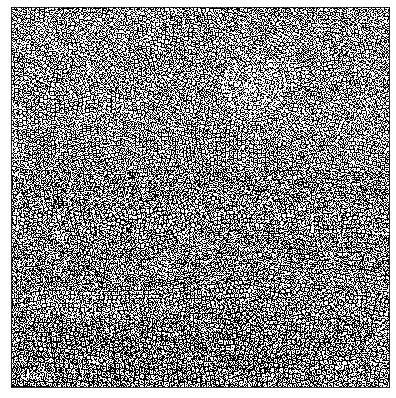

In [27]:
val_local=threshold_local(pintura_puntos, 5, 'mean')
img_local = pintura_puntos>val_local
imshow(img_local)

Se implementa modifica los parámetros del umbral **threshold_local**, el cual es un poco parecido al posible resultado.

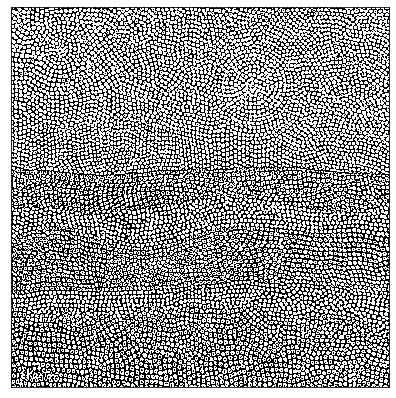

In [28]:
val_local=threshold_local(pintura_puntos, 15, 'mean')
img_local_mean = pintura_puntos>val_local
imshow(img_local_mean)
imagenes_cercanas["threshold_local_mean-15"]=img_local_mean

Se implementa modifica los parámetros del umbral **threshold_local**, el cual es un muy parecido al posible resultado.

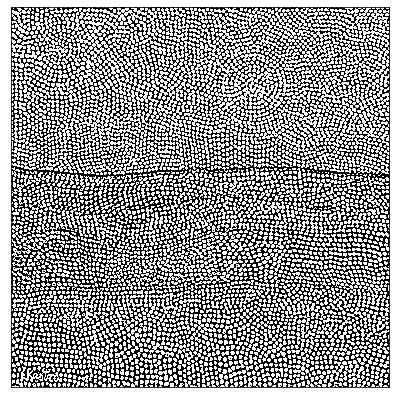

In [29]:
val_local=threshold_local(pintura_puntos, 27, 'mean')
img_local_mean = pintura_puntos>val_local
imshow(img_local_mean)
imagenes_cercanas["threshold_local_mean-27"]=img_local_mean

Se implementa modifica los parámetros del umbral **threshold_local**, se modifca el valor del parametro method, utilizado para determinar el tipo de metodos empleado para realizar la umbralizacion adaptativa, por 'gaussian' el cual es parecido al posible resultado.

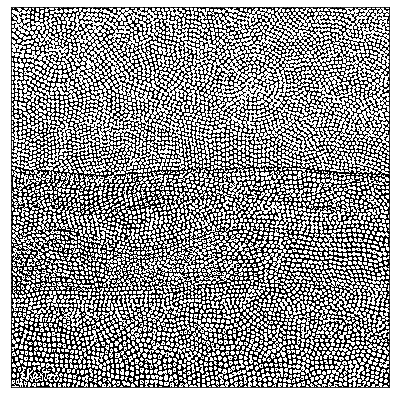

In [30]:
val_local=threshold_local(pintura_puntos, 35,  'gaussian')
img_local_gauss = pintura_puntos>val_local
imshow(img_local_gauss)
imagenes_cercanas["threshold_local-gaussian-35"]=img_local_gauss

Se implementa modifica los parámetros del umbral **threshold_local** con umbralizacion adaptativa metodo 'gaussian': El resultado es muy parecido al posible resultado.

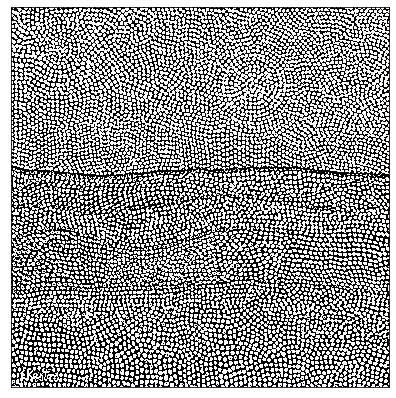

In [31]:
val_local=threshold_local(pintura_puntos, 55,  'gaussian')
img_local = pintura_puntos>val_local
imshow(img_local)
imagenes_cercanas["threshold_local-gaussian-55"]=img_local

### Análisis umbral threshold_niblack

Se implementa modifica los parámetros del umbral **threshold_niblack** con una ventana=5 y k=0.8. El resultado está muy lejos del posible resultado.

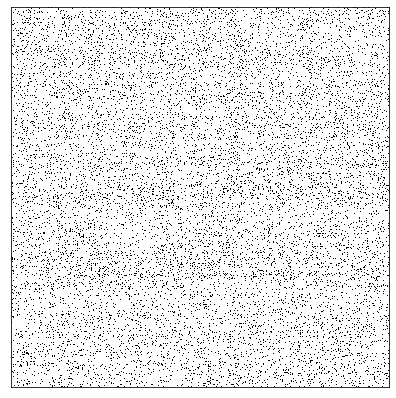

In [32]:
val_niblack=threshold_niblack(pintura_puntos, window_size=5, k=0.8)
img_niblack = pintura_puntos>val_niblack
imshow(img_niblack)

Se implementa modifica los parámetros del umbral **threshold_niblack** con una ventana=11 y k=0.8. El resultado está muy lejos del posible resultado.

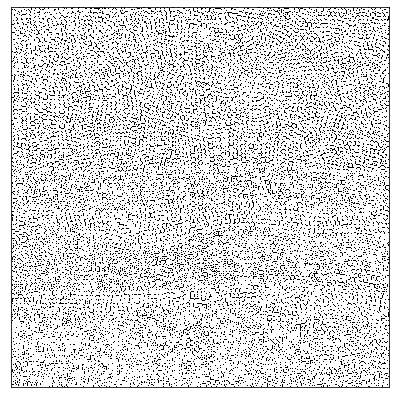

In [34]:
val_niblack=threshold_niblack(pintura_puntos, window_size=11, k=0.8)
img_niblack = pintura_puntos>val_niblack
imshow(img_niblack)

Luego se optó por modificar el valor de k. Se modifica los parámetros del umbral **threshold_niblack** con una ventana=55 y k=0.1. El resultado es parecido al resultado objetivo.

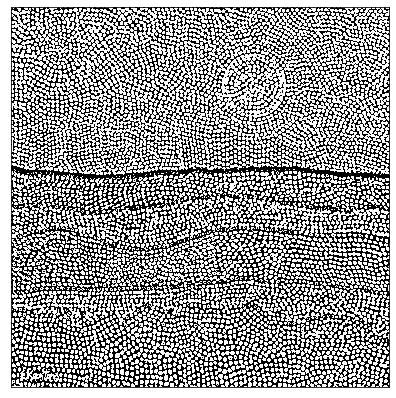

In [17]:
val_niblack=threshold_niblack(pintura_puntos, window_size=55, k=0.1)
img_niblack = pintura_puntos>val_niblack
imshow(img_niblack)
imagenes_cercanas["threshold_niblack-55-0.1"]=img_niblack

 Se modifica los parámetros del umbral **threshold_niblack** con una ventana=41 y k=0.2. El resultado es muy parecido al resultado objetivo.

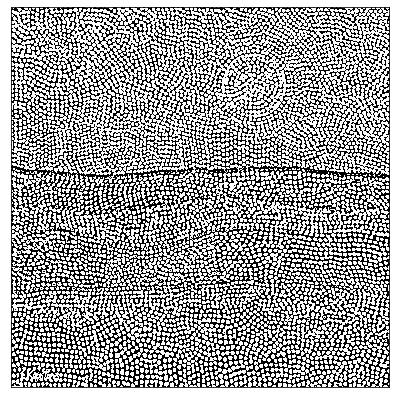

In [18]:
val_niblack=threshold_niblack(pintura_puntos, window_size=41, k=0.2)
img_niblack = pintura_puntos>val_niblack
imshow(img_niblack)
imagenes_cercanas["threshold_niblack-41-0.2"]=img_niblack

### Análisis umbral threshold_sauvola

Se implementa modifica los parámetros del umbral **threshold_sauvola** con una ventana=15 y k=0.2. El resultado está muy lejos del posible resultado.

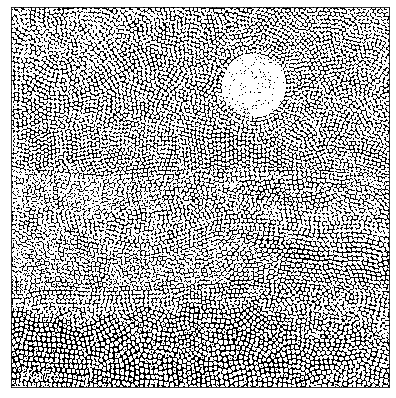

In [19]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=15, k=0.2)
img_sauvola = pintura_puntos > val_sauvola
imshow(img_sauvola)

Se modifica los parámetros del umbral **threshold_sauvola** con una ventana=55 y k=0.2. El resultado un poco parecido al imagen objetivo.

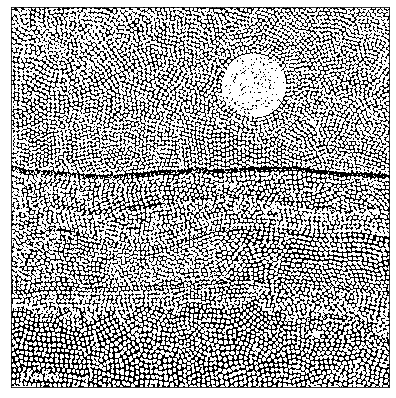

In [20]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=55, k=0.2)
img_sauvola = pintura_puntos > val_sauvola
imshow(img_sauvola)

Se modifica los parámetros del umbral **threshold_sauvola** con una ventana=31 y k=0.02. El resultado un muy parecido al imagen objetivo.

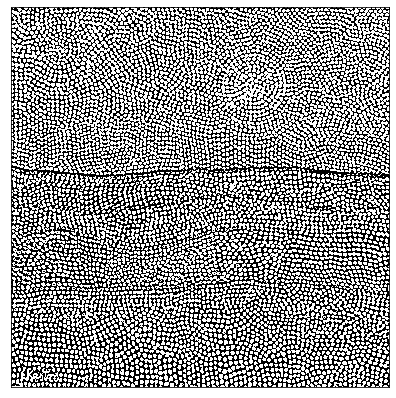

In [21]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=31, k=0.02)
img_sauvola = pintura_puntos > val_sauvola
imshow(img_sauvola)
imagenes_cercanas["img_sauvola-31-0.02"]=img_sauvola

# Empleo de morfología matemática

* Debido a que la forma de la piedras es circular se tomara el disco como morofología matemática para el procesamiento.
* Se deifine la función **contar_regiones** la cual hace uso de la constantes **min_area_region** y **max_area_region**, para descartar posibles rudios producidos por los difentes tipos de morfologias aplicadas. Ya que puede ser que las piedras se separen en pequeños puntos debido a la erosión o se unan grupos de piedras.
* Se empleara la mofología únicamente sobre las imagenes que en del punto anterior se consideraron muy cercanas al objetivo.

In [38]:
def contar_regiones(imagen):
    label_imagen = label(imagen)    
    if min_area_region == 0 and max_area_region == 0:
        reg_props = regionprops(label_imagen)
        return len(reg_props)
    else:
        contador = 0
        for region in regionprops(label_imagen):        
            if min_area_region < region.area  and region.area< max_area_region:            
                contador=contador+1
        return contador 

Se implementa una función que permite realizar sucesivamente el operador erosión. 

## Morfología sobre imagen con umbral threshold_local

Para empezar con el procesamiento de la imagen se realiza varias erosiones de forma sucesiva y se evaluara el resultado.

Nro discos: 7762


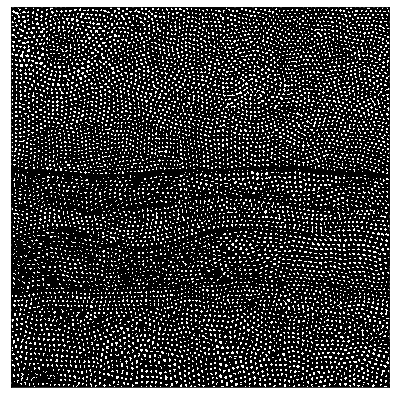

In [23]:
im_erosion1 = erosion(img_local_mean, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro discos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Se realiza una segunda erosión para validar si existe un mejor resultado. Pero como se puede observar empiezan ha aparecer muchos espacios vacios por efecto de la erosión.

Nro discos: 7705


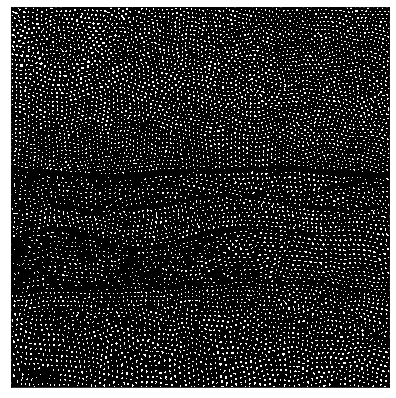

In [24]:
im_erosion5 = erosion(im_erosion4, disk(1))
print("Nro discos:",contar_regiones(im_erosion5))
imshow(im_erosion5)

Se realizara una operación de cierre sobre la imagen erosionada 4 veces discos.

Nro discos: 7762


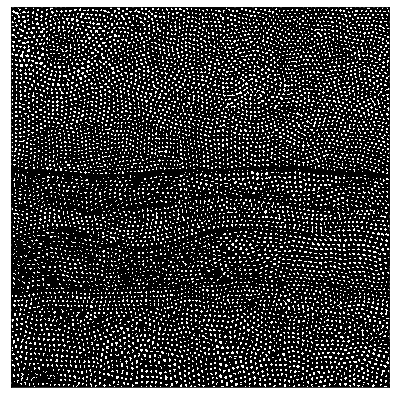

In [25]:
im_closing1 = closing(im_erosion4, disk(1))
print("Nro discos:",contar_regiones(im_closing1))
imshow(im_closing1)

Sobre la imagen anterior se realiza una apertura para ver el mejor resultado

Nro discos: 7787


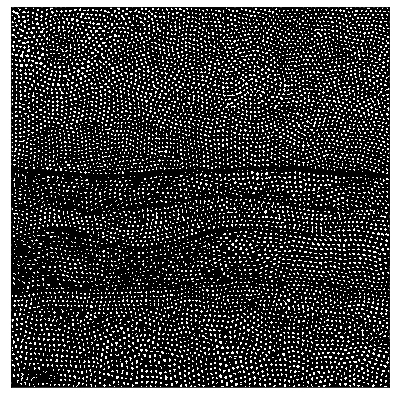

In [26]:
opening1 = opening(im_closing1, disk(1))
print("Nro discos:",contar_regiones(opening1))
imshow(opening1)

Como se puede observar exsiten discos con espacios vacios lo mejor es llenarlos.

Nro discos: 7787


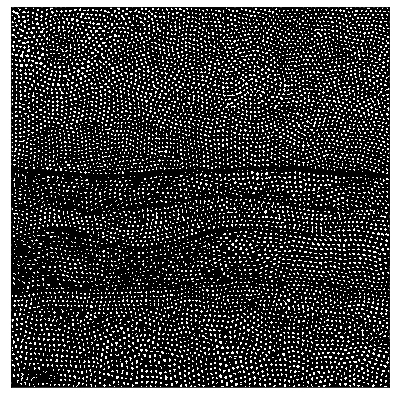

In [27]:
im_fill1 = ndi.binary_fill_holes(opening1, disk(1))
print("Nro discos:",contar_regiones(im_fill1))
imshow(im_fill1)

Luego se puede aplicar una erosion para validar el resultado. Pero se evidencia que se reduce el numero de discos detectados.

Nro discos: 7705


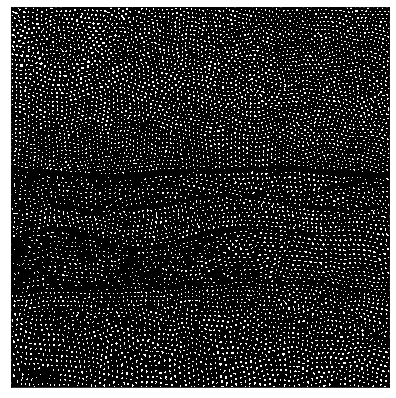

In [28]:
im_erosion6 = erosion(im_fill1, disk(1))
print("Nro discos:",contar_regiones(im_erosion6))
imshow(im_erosion6)

Luego se puede aplicar una clausra para separa  para validar el resultado. Pero se evidencia que se reduce el numero de discos detectados.

Nro discos: 7705


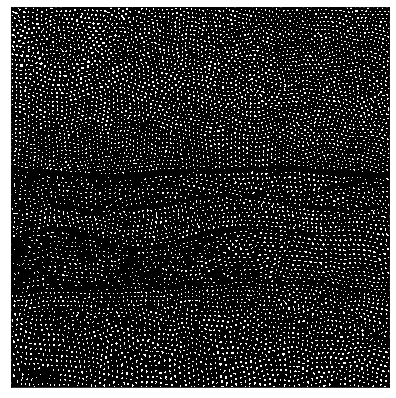

In [29]:
im_closing2 = erosion(im_fill1, disk(1))
print("Nro discos:",contar_regiones(im_closing2))
imshow(im_closing2)

Si se aplica una apertura únicamete  se obtendra el mismo resultado. Pero se evidencia que se reduce el numero de discos detectados.

Nro discos: 7787


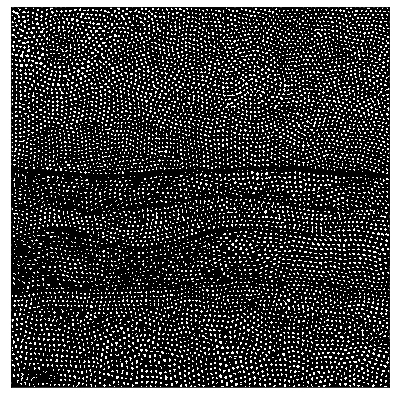

In [30]:
img_opening2 = opening(im_fill1, disk(1))
print("Nro discos:",contar_regiones(img_opening2))
imshow(img_opening2)

 Método Morfología:eros_open_clos_fill_dil_imagen-local_mean-15

Luego al parece existir un patron que utilizaremos en el resto de imagenes para validar sus resultados.

Nro discos: 8332


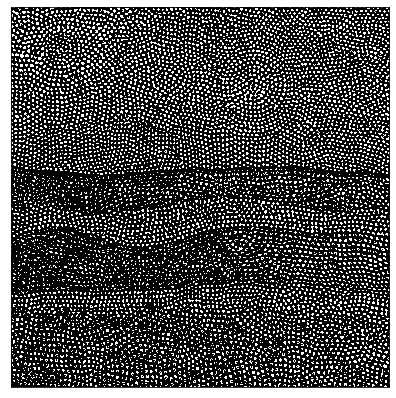

In [31]:
im_erosion1 = erosion(img_local_gauss, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
print("Nro discos:",contar_regiones(im_erosion3))
imshow(im_erosion3)

Si se aplica una erosion adicional no se llega al objetivo desdeado.

Nro discos: 8261


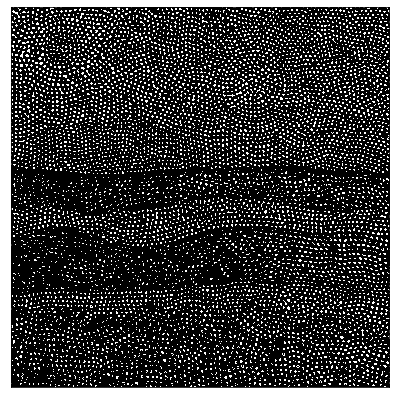

In [32]:
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro discos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Se aplica una apertura, un cierre y el llenado de los huecos vacios.

Nro discos: 8406


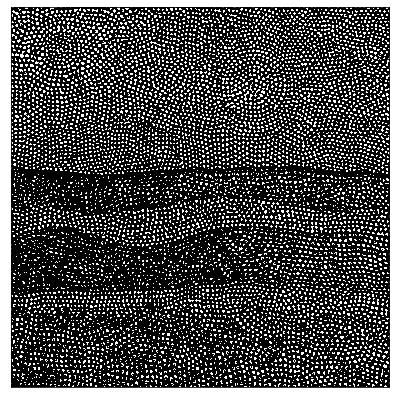

In [33]:
img_opening1 = opening(im_erosion3, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro discos:",contar_regiones(img_fill1))
imshow(img_fill1)

Se analiza la imagen img_niblack

Nro discos: 7134


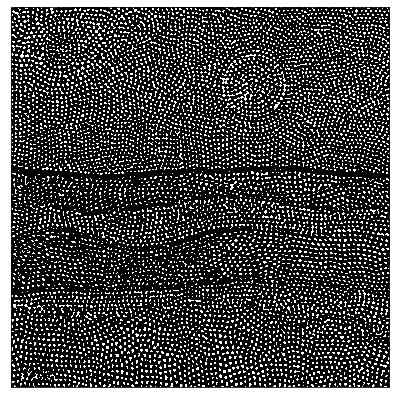

In [34]:
im_erosion1 = erosion(img_niblack, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro discos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Se aplica una apertura, un cierre y el llenado de los huecos vacios.

Nro discos: 7419


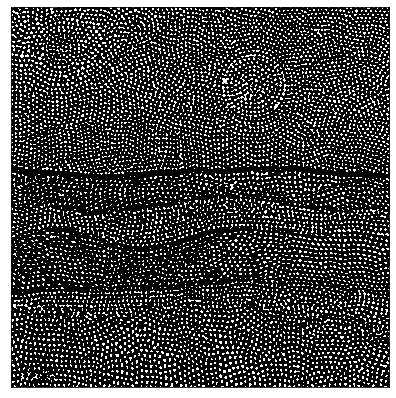

In [35]:
img_opening1 = opening(im_erosion4, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro discos:",contar_regiones(img_fill1))
imshow(img_fill1)

Se analiza la imagen img_sauvola.

Nro discos: 7590


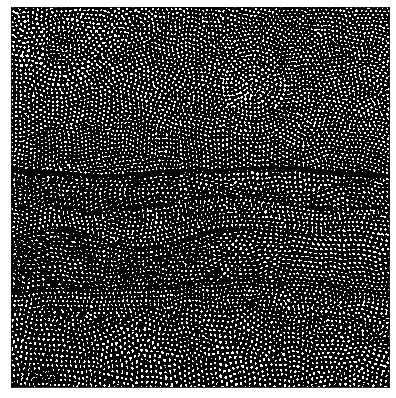

In [36]:
im_erosion1 = erosion(img_sauvola, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro discos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Nro discos: 7685


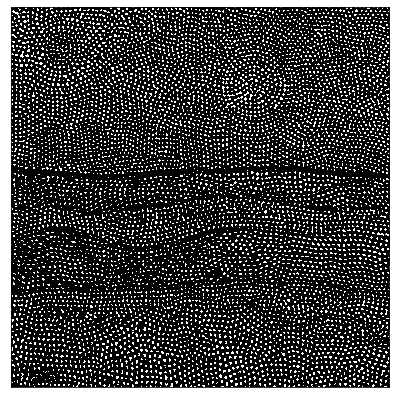

In [37]:
img_opening1 = opening(im_erosion4, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro discos:",contar_regiones(img_fill1))
imshow(img_fill1)

# Procesamiento de varios algoritmos 

Definiermos la funcion erosionar_imagen la cual realizara la erosion de una imagen de forma iterativa. Si detecta que la cantidad de discos luego de varias erosiones sucesivas es menor se detiene.

In [38]:
n_iteraciones = 6
min_area_region = 2
operadores = {"erosion":erosion,"apertura":opening,"cierre":closing,"relleno":ndi.binary_fill_holes}

In [36]:
def procesar_operador_imagen(imagen,ndimesion,operador=erosion,forma=disk):
    total_circulos = 0
    img_resultado = imagen
    tamanio_disco = 0
    iteracion = 0
    for n in range(1,ndimesion):        
        imagen_res = operador(img_resultado, forma(1))
        ncirculos = contar_regiones(imagen_res)
        if(ncirculos<total_circulos):
            break
        total_circulos = ncirculos           
        img_resultado = imagen_res        
        iteracion = n
    return img_resultado,ncirculos,iteracion

Nro discos: 8261
Iteracion: 3


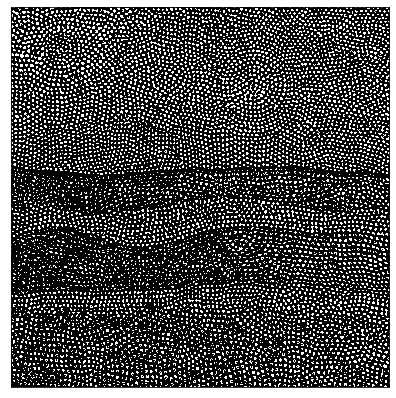

In [40]:
img,ndis,tam = procesar_operador_imagen(img_local_gauss,
                                        n_iteraciones,
                                        operador=erosion,
                                        forma=disk)
print("Nro discos:",ndis)
print("Iteracion:",tam)
imshow(img)

In [41]:
def procesar_operadores(imagen, operadores):
    img_resultado = imagen
    ncirculos = 0
    param_operador={}
    for nom_operador in operadores.keys():        
        operador=operadores[nom_operador]
        img,ndis,itera = procesar_operador_imagen(img_resultado,
                                            n_iteraciones,
                                            operador=operador,
                                            forma=disk)
        if(ndis>=ncirculos):
            ncirculos = ndis
            img_resultado = img
            param_operador[nom_operador]={"ndiscos":ndis,
                                          "iteracion":itera}
    return img_resultado,ncirculos,param_operador    

Nro discos: 8439
Operaciones: {'erosion': {'ndiscos': 8261, 'iteracion': 3}, 'apertura': {'ndiscos': 8439, 'iteracion': 5}, 'relleno': {'ndiscos': 8439, 'iteracion': 5}}


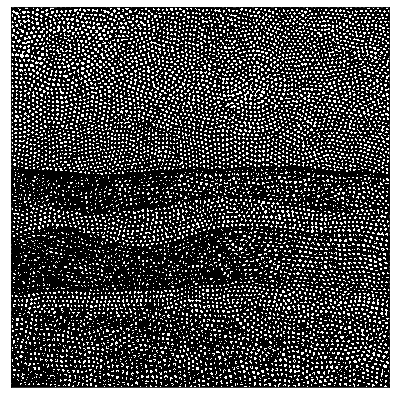

In [81]:
img,ndis,par_oper = procesar_operadores(img_local_gauss,operadores)
print("Nro discos:",ndis)
print("Operaciones:",par_oper)
imshow(img)

In [43]:
def ordenar_operadores(lista_imagen_operador):
    return sorted(lista_imagen_operador.items(), key=lambda x: x[1]['ndiscos'], reverse=True)

In [44]:
def maximizar_operador(lista_imagen_operador):
    lista_ordenada = ordenar_operadores(lista_imagen_operador)
    return lista_ordenada[0]

In [98]:
def procesamiento_mejor_operador(imagen,operadores):
    img_resultado = imagen
    ncirculos = 0
    acciones = {}
    nom_max_operacion = ""
    nom_ant_operacion = ""
    agregar_operacion = True
    for n in range(1,n_iteraciones):
        lista_img_operadores={} 
        agregar_operacion = True
        for nom_operador in operadores.keys():            
            operador=operadores[nom_operador]  
            if nom_operador == nom_ant_operacion:
                continue
            img,ndis,itera = procesar_operador_imagen(img_resultado,
                                                n_iteraciones,
                                                operador=operador,
                                                forma=disk)
            lista_img_operadores[nom_operador]={"ndiscos":ndis,
                                           "iteracion":itera,
                                           "operador":nom_operador,
                                           "imagen":img}    
        max_operacion = maximizar_operador(lista_img_operadores) 
        nom_max_operacion = max_operacion[0]
        if nom_ant_operacion != nom_max_operacion:
            nom_ant_operacion = nom_max_operacion
            ncirculos = max_operacion[1]['ndiscos']
            img_resultado = max_operacion[1]['imagen']
            acciones["Accion-"+str(n)] = "Operador:{0}, Iteraciones:{1}, Nro. Cirulos:{2}".format(
                max_operacion[1]['operador'],max_operacion[1]['iteracion'],max_operacion[1]['ndiscos'])
    return img_resultado,ncirculos,acciones

Se procesan las imagenes maximizando el mejor operador de esta manera selecionara unicamente el mejor operador.

Nro discos: 8439
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:3, Nro. Cirulos:8261', 'Accion-2': 'Operador:apertura, Iteraciones:5, Nro. Cirulos:8439', 'Accion-3': 'Operador:relleno, Iteraciones:5, Nro. Cirulos:8439', 'Accion-4': 'Operador:apertura, Iteraciones:5, Nro. Cirulos:8439', 'Accion-5': 'Operador:relleno, Iteraciones:5, Nro. Cirulos:8439'}


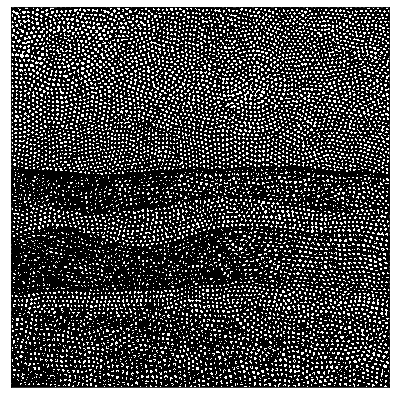

In [99]:
img,ndis,acciones = procesamiento_mejor_operador(img_local_gauss,operadores)
print("Nro discos:",ndis)
print("Acciones:",acciones)
imshow(img)

In [100]:
for nombre_imagen in imagenes_cercanas.keys():    
    try:
        img,ndis,acciones = procesamiento_mejor_operador(imagenes_cercanas[nombre_imagen],operadores)        
        lista_algortimo_img_dicos[nombre_imagen]={"nimagen":nombre_imagen,
                                                  "ndiscos":ndis,
                                                  "acciones":acciones,
                                                  "imagen":img}
    except RuntimeError:
      print(" footprint array has incorrect shape")    

In [76]:
def mostar_top_imagenes(lista_imagenes_ordenada):
    contador = 0
    for item in lista_imagenes_ordenada:    
        nombre = item[0]       
        ncirculos = item[1]['ndiscos']
        img_resultado = item[1]['imagen']
        print('Nro. Discos: {0} Algoritmo: {1}'.format(ncirculos,nombre))
        print("Acciones:",item[1]['acciones'])
        imshow(img_resultado)     

Nro. Discos: 10308 Algoritmo: threshold_local_mean-15
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:3', 'Accion-2': 'Operador:cierre, Iteraciones:5', 'Accion-3': 'Operador:cierre, Iteraciones:5', 'Accion-4': 'Operador:cierre, Iteraciones:5', 'Accion-5': 'Operador:cierre, Iteraciones:5'}


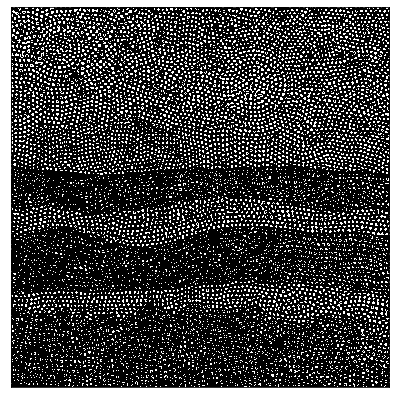

Nro. Discos: 8439 Algoritmo: threshold_local-gaussian-35
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:3', 'Accion-2': 'Operador:apertura, Iteraciones:5', 'Accion-3': 'Operador:apertura, Iteraciones:5', 'Accion-4': 'Operador:apertura, Iteraciones:5', 'Accion-5': 'Operador:apertura, Iteraciones:5'}


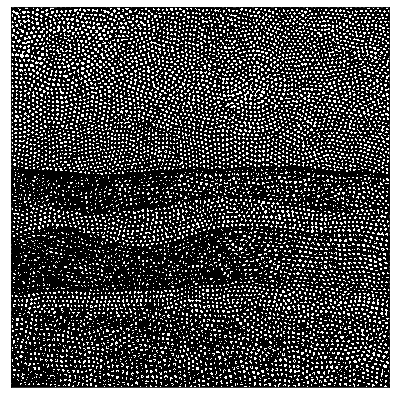

Nro. Discos: 7787 Algoritmo: threshold_local_mean-27
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:4', 'Accion-2': 'Operador:apertura, Iteraciones:5', 'Accion-3': 'Operador:apertura, Iteraciones:5', 'Accion-4': 'Operador:apertura, Iteraciones:5', 'Accion-5': 'Operador:apertura, Iteraciones:5'}


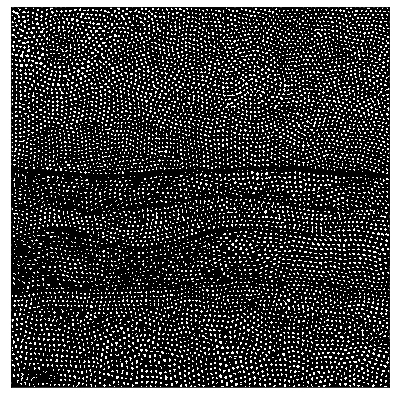

Nro. Discos: 7721 Algoritmo: threshold_local-gaussian-55
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:4', 'Accion-2': 'Operador:cierre, Iteraciones:5', 'Accion-3': 'Operador:cierre, Iteraciones:5', 'Accion-4': 'Operador:cierre, Iteraciones:5', 'Accion-5': 'Operador:cierre, Iteraciones:5'}


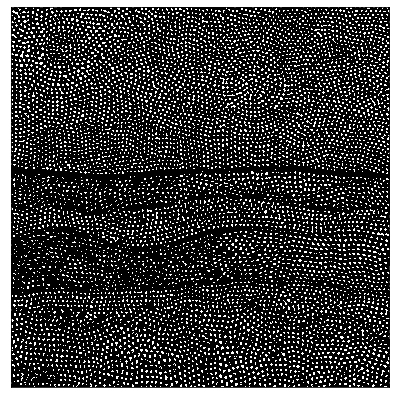

Nro. Discos: 7629 Algoritmo: img_sauvola-31-0.02
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:5', 'Accion-2': 'Operador:cierre, Iteraciones:5', 'Accion-3': 'Operador:cierre, Iteraciones:5', 'Accion-4': 'Operador:cierre, Iteraciones:5', 'Accion-5': 'Operador:cierre, Iteraciones:5'}


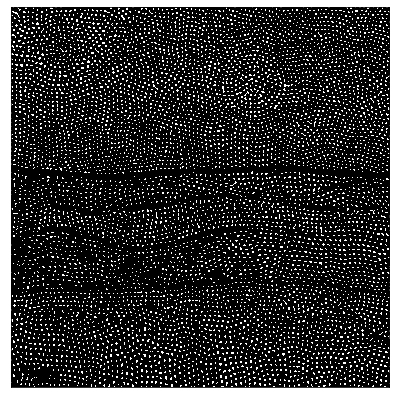

Nro. Discos: 7474 Algoritmo: threshold_niblack-41-0.2
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:5', 'Accion-2': 'Operador:apertura, Iteraciones:5', 'Accion-3': 'Operador:apertura, Iteraciones:5', 'Accion-4': 'Operador:apertura, Iteraciones:5', 'Accion-5': 'Operador:apertura, Iteraciones:5'}


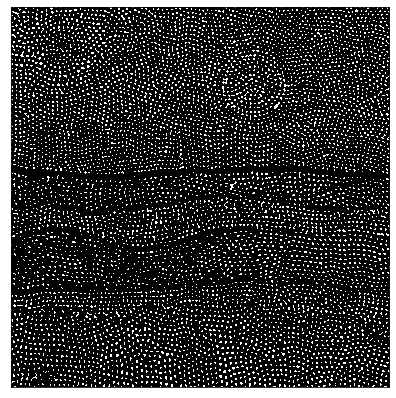

Nro. Discos: 7289 Algoritmo: threshold_niblack-55-0.1
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:5', 'Accion-2': 'Operador:cierre, Iteraciones:5', 'Accion-3': 'Operador:cierre, Iteraciones:5', 'Accion-4': 'Operador:cierre, Iteraciones:5', 'Accion-5': 'Operador:cierre, Iteraciones:5'}


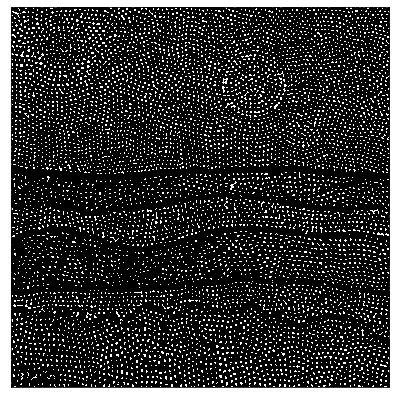

In [77]:
lista_ordenada = ordenar_operadores(lista_algortimo_img_dicos)
mostar_top_imagenes(lista_ordenada)        

In [50]:
error

NameError: name 'error' is not defined

# Buscar con imagenes de muestra

Se toma varias muestras de la imagen:
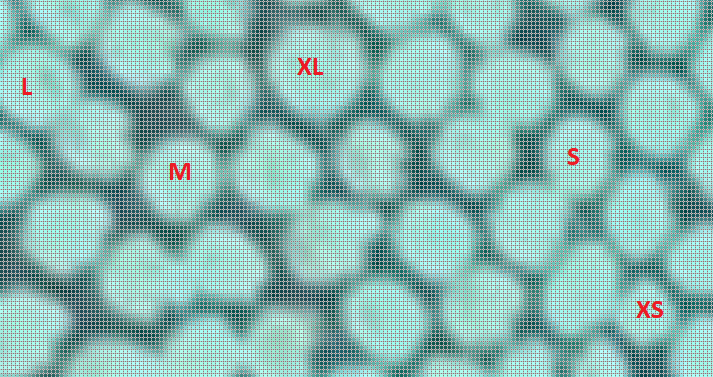

In [256]:
def calcular_radio(region):
    y0, x0 = region.centroid
    orientation = region.orientation                
    x2 = x0 - math.sin(orientation) * 0.5 * region.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * region.major_axis_length                
    radio = math.sqrt(pow(x2-x0,2)+pow(y2-y0,2))
    return radio


In [257]:
import math
tamanios={"xs":11,"s":15,"m":19,"l":23,"xl":27}
tolerancia = 4
def lista_vetanas_regiones(imagen,tamanios):    
    label_imagen = label(imagen)    
    ncirculos = 0
    totales = {}
    max_radios = {}
    for key_tam in tamanios.keys():
        totales[key_tam] = 0
        max_radios[key_tam] = 0
    for region in regionprops(label_imagen):
        for key_tam in tamanios.keys():
            tamanio = tamanios[key_tam]
            min_radio = (tamanio-tolerancia)/2
            max_radio = (tamanio+tolerancia)/2
            radio = calcular_radio(region)
            if min_radio < radio and radio<max_radio:                
                rad_tam = max_radios[key_tam]
                if(rad_tam<radio):
                    max_radios[key_tam] = radio
                totales[key_tam] = totales[key_tam] + 1
                ncirculos=ncirculos+1
                break
    pesos = {}
    for key_tam in tamanios.keys():
        pesos[key_tam] = totales[key_tam]/ncirculos    
    return ncirculos,totales,pesos,max_radios

In [271]:
img,ndis,tam = procesar_operador_imagen(img_local_gauss,
                                        n_iter,
                                        operador=erosion,
                                        forma=disk)
ncirculos,totales,pesos,max_radios = lista_vetanas_regiones(img_local_gauss,tamanios)
print(ncirculos,totales,pesos,max_radios)

4620 {'xs': 99, 's': 1364, 'm': 2416, 'l': 655, 'xl': 86} {'xs': 0.02142857142857143, 's': 0.29523809523809524, 'm': 0.5229437229437229, 'l': 0.14177489177489178, 'xl': 0.018614718614718615} {'xs': 7.457470461057595, 's': 9.497884793693052, 'm': 11.498405706930727, 'l': 13.491597408497546, 'xl': 15.444111534030803}


In [262]:
import random
def generar_radios_pesos(tamanios,pesos):
    lista_radios = []
    lista_pesos = []
    for key_tam in tamanios.keys():
        radio = tamanios[key_tam]
        lista_radios.append(radio)
    for key_pes in pesos.keys():
        peso = pesos[key_pes]
        lista_pesos.append(peso)
    lista_pesos = np.array(lista_pesos)
    lista_pesos /= lista_pesos.sum()
    return lista_radios,lista_pesos
        
lista_radios,lista_pesos = generar_radios_pesos(max_radios,pesos)
print(lista_pesos.sum())
print(random.choices(lista_radios, weights=p))


1.0000000000000002
[7.499795701107983]


In [268]:
import numpy as np
class Circulo:
    def __init__(self, cx, cy, r, icolour=None):        
        self.cx, self.cy, self.r = cx, cy, r
        self.icolour = icolour
        
    def valida_sobre_posicion(self, cx, cy, r):
        d = np.hypot(cx-self.cx, cy-self.cy)
        return d < r + self.r
    
    def dibujar_circulo(self, fo):
        print('<circle cx="{}" cy="{}" r="{}" class="c{}"/>'
            .format(self.cx, self.cy, self.r, self.icolour), file=fo)

class Procesador:
    def __init__(self,n, alto, ancho,lista_radios,lista_pesos,
                 rho_min=0.005,rho_max=0.05):        
        self.alto,self.ancho = alto,ancho
        self.lista_radios = lista_radios
        self.lista_pesos = lista_pesos
        R = int(ancho/2)
        if alto<ancho:
            R = int(alto/2)        
        self.R, self.n = R, n   
        self.CX, self.CY = self.ancho // 2, self.alto // 2
        self.rmin, self.rmax = R * rho_min, R * rho_max
        self.colores = ['#993300', '#a5c916', '#00AA66', '#FF9900']

    def cabecera_imagen(self):
        print('<?xml version="1.0" encoding="utf-8"?>\n'
        '<svg xmlns="http://www.w3.org/2000/svg"\n' + ' '*5 +
          'xmlns:xlink="http://www.w3.org/1999/xlink" width="{}" height="{}" >'
                .format(self.ancho, self.alto), file=self.fo)

    def decorador(func):
        def wrapper(self):
            print("""
            <defs>
            <style type="text/css"><![CDATA[""", file=self.fo)
            func(self)
            print("""]]></style>
            </defs>""", file=self.fo)
        return wrapper

    @decorador
    def estilos_svg(self):
        print('circle {stroke: none;}', file=self.fo)
        for i, c in enumerate(self.colores):
            print('.c{} {{fill: {};}}'.format(i, c), file=self.fo)

    def crear_svg(self, nombre_archivo, *args, **kwargs):
        ncolours = len(self.colores)
        with open(nombre_archivo, 'w') as self.fo:
            self.cabecera_imagen()
            self.estilos_svg()
            for circulo in self.circulos:
                circulo.dibujar_circulo(self.fo)
            print('</svg>', file=self.fo)

    def agregar_circulo(self, r):        
        guard = 500
        while guard:            
            cr, cphi = (2 *self.R * np.sqrt(np.random.random()),
                        2 *self.R * np.random.random())
            cx, cy = cr * np.cos(cphi), cr * np.sin(cphi)            
            dimX = cx+self.CX+r
            dimY = cy+self.CY+r
            if 0<dimX<self.alto and 0<dimY<self.ancho:            
                if not any(circulo.valida_sobre_posicion(self.CX+cx, self.CY+cy, r)
                                    for circulo in self.circulos):  
                    if cx+self.CX+r>self.alto:
                        print('alto')
                    if cy+self.CY>self.ancho:
                        print('ancho')
                    circulo = Circulo(cx+self.CX, cy+self.CY, r,
                                icolour=np.random.randint(len(self.colores)))
                    self.circulos.append(circulo)
                    return
            guard -= 1
            
    def crear_circulos_aletorios(self):        
        self.circulos = []
        radios = np.random.choice(self.lista_radios,self.n,p=self.lista_pesos)
        radios[::-1].sort()        
        for radio in radios:
            self.agregar_circulo(radio)
        return len(self.circulos)


In [ ]:
(alto,ancho) = pintura_puntos.shape
print("Dimensiones imagen original {0} x {1} píxeles".format(ancho,alto))
print("Radios:",lista_radios)
print("Pesos:",lista_pesos)
circles = Procesador(12500,alto,ancho,lista_radios,lista_pesos)
nciruclos = circles.crear_circulos_aletorios()
print("Nro. circulos:",nciruclos)
circles.crear_svg('circulos.svg')

Dimensiones imagen original 1920 x 1930 píxeles
Radios: [7.499795701107983, 9.497236509482565, 11.496690706585037, 13.499847632993559, 15.447464464019]
Pesos: [0.31653008 0.51105613 0.1431885  0.02304005 0.00618525]


[[0.50440039 0.60581843 0.68455529 0.74059608 0.7756302  0.74817922
  0.67366941 0.5633     0.47310392 0.44368078 0.4837298  0.55710078
  0.61200275 0.71592784 0.74029059 0.74029059 0.7010749  0.62934784
  0.53130863 0.41168941 0.31812235 0.24361255 0.2001698  0.18501137
  0.20128588 0.21863882]
 [0.39569765 0.45482667 0.50891804 0.5590651  0.60305843 0.58542275
  0.5540502  0.51034745 0.49466118 0.52686706 0.59631647 0.67418235
  0.72599608 0.79828078 0.8218102  0.83749647 0.8265651  0.79098824
  0.70749647 0.58592784 0.48480039 0.38086745 0.30635765 0.24247373
  0.22873686 0.23265843]
 [0.30942314 0.32736431 0.34502275 0.3831451  0.42825451 0.44001922
  0.46412196 0.50333765 0.56494392 0.63945373 0.71339804 0.78089804
  0.82011373 0.86188196 0.8814898  0.90668588 0.91452902 0.91452902
  0.86941961 0.77808471 0.6918102  0.56323176 0.46322039 0.35341647
  0.29345412 0.26992471]
 [0.24862745 0.25452118 0.24753412 0.28480039 0.33886902 0.38650118
  0.44924627 0.54925765 0.64364314 0.7220

In [15]:
import numpy as np

class Circle:
    """A little class representing an SVG circle."""

    def __init__(self, cx, cy, r, icolour=None):
        """Initialize the circle with its centre, (cx,cy) and radius, r.

        icolour is the index of the circle's colour.

        """
        self.cx, self.cy, self.r = cx, cy, r
        self.icolour = icolour

    def overlap_with(self, cx, cy, r):
        """Does the circle overlap with another of radius r at (cx, cy)?"""

        d = np.hypot(cx-self.cx, cy-self.cy)
        return d < r + self.r

    def draw_circle(self, fo):
        """Write the circle's SVG to the output stream, fo."""

        print('<circle cx="{}" cy="{}" r="{}" class="c{}"/>'
            .format(self.cx, self.cy, self.r, self.icolour), file=fo)

class Circles:
    """A class for drawing circles-inside-a-circle."""

    def __init__(self, width=600, height=600, R=250, n=800, rho_min=0.005,
                 rho_max=0.05, colours=None):
        """Initialize the Circles object.

        width, height are the SVG canvas dimensions
        R is the radius of the large circle within which the small circles are
        to fit.
        n is the maximum number of circles to pack inside the large circle.
        rho_min is rmin/R, giving the minimum packing circle radius.
        rho_max is rmax/R, giving the maximum packing circle radius.
        colours is a list of SVG fill colour specifiers to be referenced by
            the class identifiers c<i>. If None, a default palette is set.

        """

        self.width, self.height = width, height
        self.R, self.n = R, n
        # The centre of the canvas
        self.CX, self.CY = self.width // 2, self.height // 2
        self.rmin, self.rmax = R * rho_min, R * rho_max
        self.colours = colours or ['#993300', '#a5c916', '#00AA66', '#FF9900']

    def preamble(self):
        """The usual SVG preamble, including the image size."""

        print('<?xml version="1.0" encoding="utf-8"?>\n'

        '<svg xmlns="http://www.w3.org/2000/svg"\n' + ' '*5 +
          'xmlns:xlink="http://www.w3.org/1999/xlink" width="{}" height="{}" >'
                .format(self.width, self.height), file=self.fo)

    def defs_decorator(func):
        """For convenience, wrap the CSS styles with the needed SVG tags."""

        def wrapper(self):
            print("""
            <defs>
            <style type="text/css"><![CDATA[""", file=self.fo)

            func(self)

            print("""]]></style>
            </defs>""", file=self.fo)
        return wrapper

    @defs_decorator
    def svg_styles(self):
        """Set the SVG styles: circles are coloured with no border."""

        print('circle {stroke: none;}', file=self.fo)
        for i, c in enumerate(self.colours):
            print('.c{} {{fill: {};}}'.format(i, c), file=self.fo)

    def make_svg(self, filename, *args, **kwargs):
        """Create the image as an SVG file with name filename."""

        ncolours = len(self.colours)
        with open(filename, 'w') as self.fo:
            self.preamble()
            self.svg_styles()
            for circle in self.circles:
                circle.draw_circle(self.fo)
            print('</svg>', file=self.fo)

    def _place_circle(self, r):
        # The guard number: if we don't place a circle within this number
        # of trials, we give up.
        guard = 500
        while guard:
            # Pick a random position, uniformly on the larger circle's interior
            cr, cphi = ( 2 *self.R * np.sqrt(np.random.random()),
                         2 *self.R * np.random.random() )
            cx, cy = cr * np.cos(cphi), cr * np.sin(cphi)
            #cx, cy = 2*self.R * np.sqrt(np.random.random()),2*self.R * np.sqrt(np.random.random())
            if 0<cr+r < 600:
            # The circle fits inside the larger circle.
                if not any(circle.overlap_with(self.CX+cx, self.CY+cy, r)
                                    for circle in self.circles):
                    # The circle doesn't overlap any other circle: place it.
                    circle = Circle(cx+self.CX, cy+self.CY, r,
                                icolour=np.random.randint(len(self.colours)))
                    self.circles.append(circle)
                    return
            guard -= 1
        # Warn that we reached the guard number of attempts and gave up for
        # for this circle.
        print('guard reached.')

    def make_circles(self):
        """Place the little circles inside the big one."""

        # First choose a set of n random radii and sort them. We use
        # random.random() * random.random() to favour small circles.
        self.circles = []
        r = self.rmin + (self.rmax - self.rmin) * np.random.random(
                                self.n) * np.random.random(self.n)
        r[::-1].sort()
        # Do our best to place the circles, larger ones first.
        for i in range(self.n):
            self._place_circle(r[i])

circles = Circles(n=4500)
circles.make_circles()
circles.make_svg('circles.svg')



In [2]:
import numpy as np

class Circle:
    """A little class representing an SVG circle."""

    def __init__(self, cx, cy, r, icolour=None):
        """Initialize the circle with its centre, (cx,cy) and radius, r.

        icolour is the index of the circle's colour.

        """
        self.cx, self.cy, self.r = cx, cy, r
        self.icolour = icolour

    def overlap_with(self, cx, cy, r):
        """Does the circle overlap with another of radius r at (cx, cy)?"""

        d = np.hypot(cx-self.cx, cy-self.cy)
        return d < r + self.r

    def draw_circle(self, fo):
        """Write the circle's SVG to the output stream, fo."""

        print('<circle cx="{}" cy="{}" r="{}" class="c{}"/>'
            .format(self.cx, self.cy, self.r, self.icolour), file=fo)

class Circles:
    """A class for drawing circles-inside-a-circle."""

    def __init__(self, width=600, height=600, R=250, n=800, rho_min=0.005,
                 rho_max=0.05, colours=None):
        """Initialize the Circles object.

        width, height are the SVG canvas dimensions
        R is the radius of the large circle within which the small circles are
        to fit.
        n is the maximum number of circles to pack inside the large circle.
        rho_min is rmin/R, giving the minimum packing circle radius.
        rho_max is rmax/R, giving the maximum packing circle radius.
        colours is a list of SVG fill colour specifiers to be referenced by
            the class identifiers c<i>. If None, a default palette is set.

        """

        self.width, self.height = width, height
        self.R, self.n = R, n
        # The centre of the canvas
        self.CX, self.CY = self.width // 2, self.height // 2
        self.rmin, self.rmax = R * rho_min, R * rho_max
        self.colours = colours or ['#993300', '#a5c916', '#00AA66', '#FF9900']

    def preamble(self):
        """The usual SVG preamble, including the image size."""

        print('<?xml version="1.0" encoding="utf-8"?>\n'

        '<svg xmlns="http://www.w3.org/2000/svg"\n' + ' '*5 +
          'xmlns:xlink="http://www.w3.org/1999/xlink" width="{}" height="{}" >'
                .format(self.width, self.height), file=self.fo)

    def defs_decorator(func):
        """For convenience, wrap the CSS styles with the needed SVG tags."""

        def wrapper(self):
            print("""
            <defs>
            <style type="text/css"><![CDATA[""", file=self.fo)

            func(self)

            print("""]]></style>
            </defs>""", file=self.fo)
        return wrapper

    @defs_decorator
    def svg_styles(self):
        """Set the SVG styles: circles are coloured with no border."""

        print('circle {stroke: none;}', file=self.fo)
        for i, c in enumerate(self.colours):
            print('.c{} {{fill: {};}}'.format(i, c), file=self.fo)

    def make_svg(self, filename, *args, **kwargs):
        """Create the image as an SVG file with name filename."""

        ncolours = len(self.colours)
        with open(filename, 'w') as self.fo:
            self.preamble()
            self.svg_styles()
            for circle in self.circles:
                circle.draw_circle(self.fo)
            print('</svg>', file=self.fo)

    def _place_circle(self, r):
        # The guard number: if we don't place a circle within this number
        # of trials, we give up.
        guard = 500
        while guard:
            # Pick a random position, uniformly on the larger circle's interior
            cr, cphi = ( self.R * np.sqrt(np.random.random()),
                         2*np.pi * np.random.random() )
            cx, cy = cr * np.cos(cphi), cr * np.sin(cphi)
            if cr+r < self.R:
            # The circle fits inside the larger circle.
                if not any(circle.overlap_with(self.CX+cx, self.CY+cy, r)
                                    for circle in self.circles):
                    # The circle doesn't overlap any other circle: place it.
                    circle = Circle(cx+self.CX, cy+self.CY, r,
                                icolour=np.random.randint(len(self.colours)))
                    self.circles.append(circle)
                    return
            guard -= 1
        # Warn that we reached the guard number of attempts and gave up for
        # for this circle.
        print('guard reached.')

    def make_circles(self):
        """Place the little circles inside the big one."""

        # First choose a set of n random radii and sort them. We use
        # random.random() * random.random() to favour small circles.
        self.circles = []
        r = self.rmin + (self.rmax - self.rmin) * np.random.random(
                                self.n) * np.random.random(self.n)
        r[::-1].sort()
        # Do our best to place the circles, larger ones first.
        for i in range(self.n):
            self._place_circle(r[i])

circles = Circles(n=2000)
circles.make_circles()
circles.make_svg('circles.svg')


guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
